In [3]:
from python_speech_features import mfcc, logfbank
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.metrics import confusion_matrix
import itertools
import os

# how to download the data
# import kagglehub

# Download latest version
# path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")
# print("Path to dataset files:", path)

In [4]:
sampling_freq, audio = wavfile.read("genres/blues/blues.00000.wav")
mfcc_features = mfcc(audio, sampling_freq)
filterbank_features = logfbank(audio, sampling_freq)

In [5]:
print ('\nMFCC:\nNumber of windows =', mfcc_features.shape[0])
print ('Length of each feature =', mfcc_features.shape[1])
print ('\nFilter bank:\nNumber of windows =', filterbank_features.shape[0])
print ('Length of each feature =', filterbank_features.shape[1])


MFCC:
Number of windows = 2994
Length of each feature = 13

Filter bank:
Number of windows = 2994
Length of each feature = 26


10
genres/blues/blues.00093.wav 2994
genres/classical/classical.00079.wav 2994
genres/jazz/jazz.00016.wav 2994
genres/country/country.00088.wav 2994
genres/pop/pop.00027.wav 2992
genres/rock/rock.00011.wav 2994
genres/metal/metal.00022.wav 2992
genres/disco/disco.00052.wav 2992
genres/hiphop/hiphop.00022.wav 2994
genres/reggae/reggae.00080.wav 2992


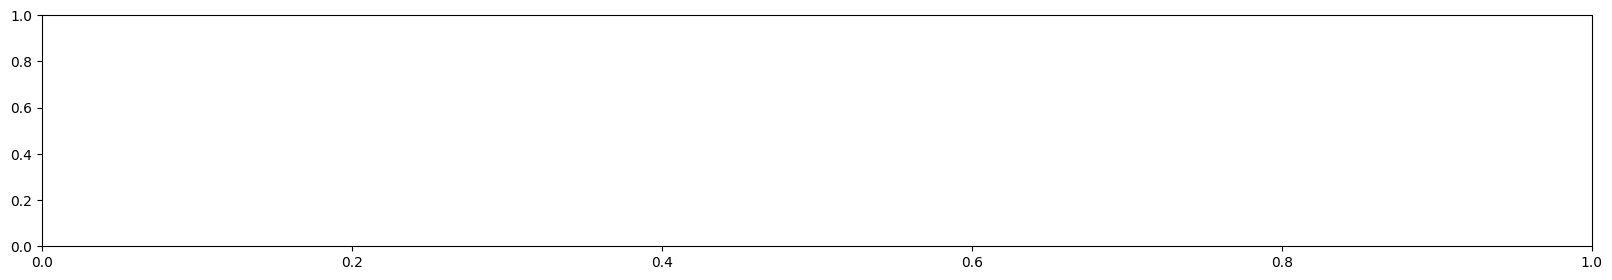

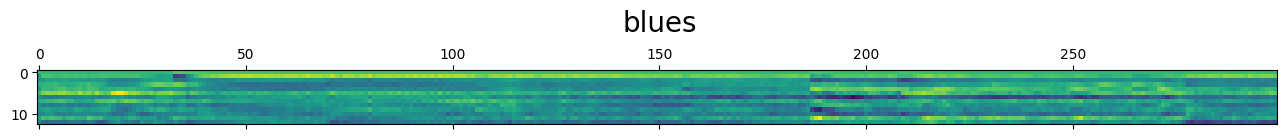

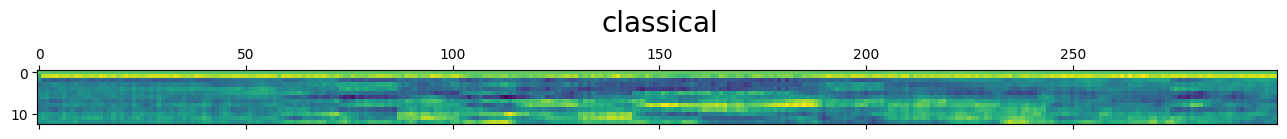

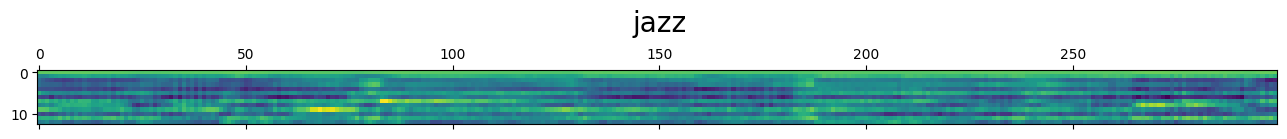

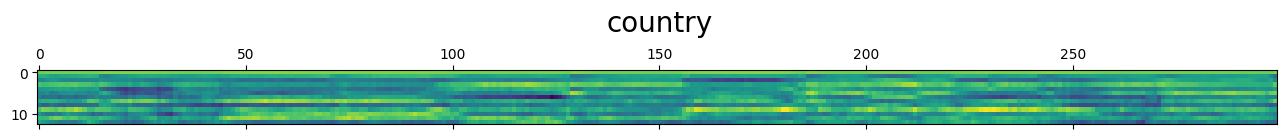

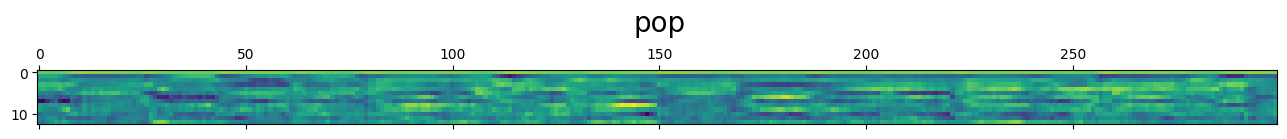

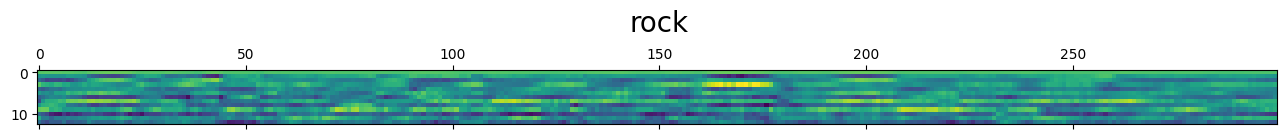

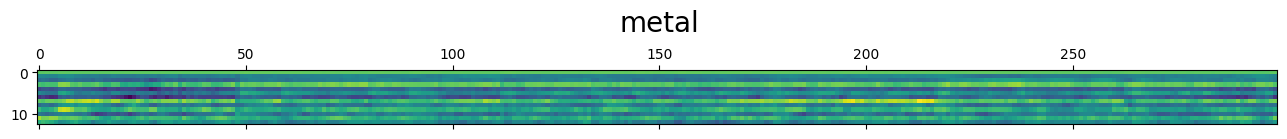

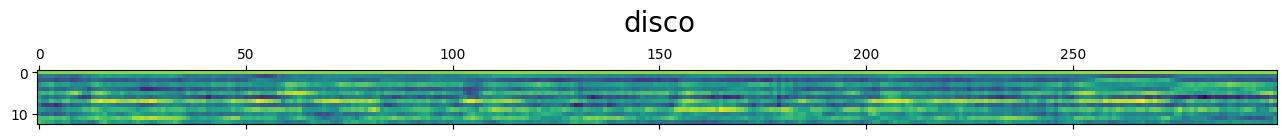

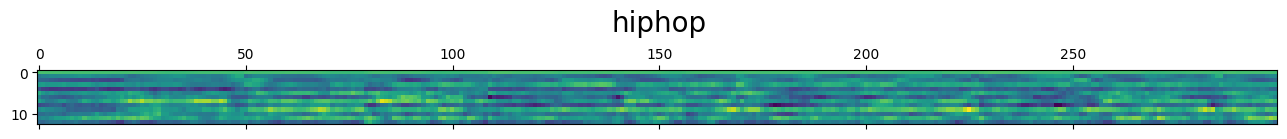

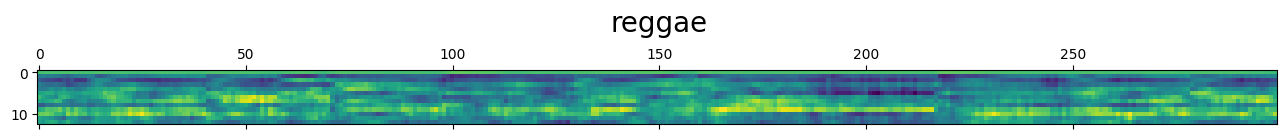

In [6]:
import glob
import os.path as path
genre_list = ["blues","classical", "jazz", "country", "pop", "rock", "metal", "disco", "hiphop", "reggae"]
print(len(genre_list))
figure = plt.figure(figsize=(20,3))
for idx ,genre in enumerate(genre_list): 
   example_data_path = 'genres/' + genre
   file_paths = glob.glob(path.join(example_data_path, '*.wav'))
   sampling_freq, audio = wavfile.read(file_paths[0])
   mfcc_features = mfcc(audio, sampling_freq, nfft=1024)
   #print(mfcc_features)
   print(file_paths[0], mfcc_features.shape[0])
   plt.yscale('linear')
   plt.matshow((mfcc_features.T)[:,:300])
   plt.text(150, -10, genre, horizontalalignment='center', fontsize=20)
 
plt.yscale('linear')
plt.show()

In [7]:
from python_speech_features import mfcc
from scipy.io import wavfile
import numpy as np
import os
import glob
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define your genres
genre_list = ["blues","classical", "jazz", "country", "pop", "rock", "metal", "disco", "hiphop", "reggae"]
data_dir = 'genres/'
X = []
y = []

# Step 1: extract features
for genre in genre_list:
    genre_path = os.path.join(data_dir, genre)
    file_paths = glob.glob(os.path.join(genre_path, "*.wav"))

    for file_path in file_paths:
        try:
            sampling_freq, audio = wavfile.read(file_path)
            features = mfcc(audio, sampling_freq, nfft=1024)
            
            # Step 2: aggregate features (e.g., mean across time axis)
            mean_features = np.mean(features, axis=0)
            
            X.append(mean_features)
            y.append(genre)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

# Step 3: train-test split
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: train decision tree
clf = DecisionTreeClassifier(max_depth = 10)
clf.fit(X_train, y_train)

# Step 5: evaluate
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Error reading genres/jazz/jazz.00054.wav: File format b'\xcb\x15\x1e\x16' not understood. Only 'RIFF' and 'RIFX' supported.
Classification Report:
              precision    recall  f1-score   support

       blues       0.46      0.52      0.49        21
   classical       0.56      0.75      0.64        12
     country       0.41      0.39      0.40        23
       disco       0.32      0.42      0.36        19
      hiphop       0.42      0.36      0.39        22
        jazz       0.43      0.39      0.41        23
       metal       0.58      0.83      0.68        18
         pop       0.53      0.53      0.53        15
      reggae       0.17      0.15      0.16        20
        rock       0.36      0.19      0.24        27

    accuracy                           0.42       200
   macro avg       0.42      0.45      0.43       200
weighted avg       0.41      0.42      0.41       200

Confusion Matrix:
[[11  1  1  1  0  0  4  0  3  0]
 [ 0  9  0  0  0  1  0  0  0  2]
 [ 2  1  9

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(y_test, y_pred))

0.425


In [12]:
scores1 = cross_val_score(clf, X, y, cv=5)
scores1

array([0.365     , 0.39      , 0.375     , 0.46      , 0.38693467])

trying to refine model: adding std, max, min, etc.

In [13]:
from python_speech_features import mfcc
from scipy.io import wavfile
import numpy as np
import os
import glob
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define your genres
genre_list = ["blues","classical", "jazz", "country", "pop", "rock", "metal", "disco", "hiphop", "reggae"]
data_dir = 'genres/'
X = []
y = []

# Step 1: extract features
for genre in genre_list:
    genre_path = os.path.join(data_dir, genre)
    file_paths = glob.glob(os.path.join(genre_path, "*.wav"))

    for file_path in file_paths:
        try:
            sampling_freq, audio = wavfile.read(file_path)

            # Extract MFCC features
            mfcc_features = mfcc(audio, sampling_freq, nfft=1024)

            # Compute mean and std across time axis (axis=0)
            mfcc_mean = np.mean(mfcc_features, axis=0)
            mfcc_std = np.std(mfcc_features, axis=0)

            # Combine into a single feature vector (length 26)
            features = np.concatenate([mfcc_mean, mfcc_std])

            # Append to dataset
            X.append(features)
            y.append(genre)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

# Step 3: train-test split
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: train decision tree
clf = DecisionTreeClassifier(max_depth = 10)
clf.fit(X_train, y_train)

# Step 5: evaluate
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Error reading genres/jazz/jazz.00054.wav: File format b'\xcb\x15\x1e\x16' not understood. Only 'RIFF' and 'RIFX' supported.
Classification Report:
              precision    recall  f1-score   support

       blues       0.35      0.38      0.36        21
   classical       0.53      0.75      0.62        12
     country       0.42      0.43      0.43        23
       disco       0.22      0.21      0.22        19
      hiphop       0.42      0.36      0.39        22
        jazz       0.64      0.39      0.49        23
       metal       0.50      0.56      0.53        18
         pop       0.53      0.60      0.56        15
      reggae       0.39      0.55      0.46        20
        rock       0.25      0.19      0.21        27

    accuracy                           0.41       200
   macro avg       0.43      0.44      0.43       200
weighted avg       0.42      0.41      0.41       200

Confusion Matrix:
[[ 8  1  3  2  0  1  1  0  2  3]
 [ 0  9  1  0  0  1  0  0  0  1]
 [ 2  0 10

In [14]:
print(accuracy_score(y_test, y_pred))

0.415
